# **Best kind of video game to develop?**
Fall 2024 Data Science Project
Darren Zheng, Vanessa Li, Donovan Lee, Eric Zhang, Andy Jiang, Sharon Wong

## Contributions:
Andy Jiang: (B, C, D, E, F) Helped parse and clean vgsales.csv (remove NaN) and perform an ANOVA test to determine if the genre of a video has an effect on the number of global sales. Chose clustering (PCA) as the primary analysis ML technique.

Darren Zheng: (A, C, D, G) Realized that our original dataset was hard to conduct, so found this new better dataset suitable for the project. I worked on creating hypothesis testing for t-tests to explore the relationship of video games sales between regions. Helped layout the results that we wanted for the team. Adjusted the report to the project’s standards.

Donovan Lee: (A, C, E, F) Did analysis of specific outliers (such as wii sports, sports games in general, and EA as a publisher) and general trends in the data, created graphs for number of games per genre and sales by genre, also worked on some visualization using the machine learning model

Eric Zhang: (B, C, E, F) Helped form conclusion for summary statistics. Coded visualization to assist in explaining primary analsyis. Helped write and contribute ideas for visual analysis.

Sharon Wong: (B, C, D, F) Helped parse and display summary statistics for vgsales.csv. Helped perform a chi square test to determine if a publisher had a relationship with the genre of video game. Helped choose clustering and analyzed the results of the graph.

Vanessa Li: (A, B, C, F) Picked the dataset from kaggle and helped in deciding the topic and question to focus on for our analysis. Also did the conclusion in determining if the analysis was effective in adding new insights to what genre to pick.

## Introduction:
During the time over [COVID](https://www.statista.com/topics/8016/covid-19-impact-on-the-gaming-industry-worldwide/#statisticChapter), many individuals had to find ways to catch up with and interact with their friends because of social distancing. Given these circumstances, the video game industry started gaining popularity. And as of now, as society becomes more reliant on technology, video games will continue to play a relevant role in our lives. All of us are Computer Science majors, and we have developed a strong interest in video games even before the COVID pandemic. With our programming skills, we would like to know what is the best video game or indie game that we should develop.

Indie video games are independent video games created by small teams or individuals without the financial or technical support by major companies. It is common [knowledge](https://medium.com/@alberto.lanata/why-indie-game-developers-succeed-and-some-fail-2c074274b819) among game enthusiasts that most indie video games fail because they don't appeal to the player base. Thus, we must take careful consideration in curating the video game. Our main goal is to create a successful video game. The success of this video game is measured by large volume of sales. In order to create a successful video game, we must look into the success and sales of other video games so that we can learn what is popular and what must be done. We must find specific factors, such as genre and platforms, to follow as inspiration.

## Data Curation:
We found this [dataset](https://www.kaggle.com/datasets/gregorut/videogamesales) (vgsales.csv) from Kaggle that will help accomplish our goal. The dataset that we choose includes videogame sales in different countries throughout the years. In this dataset, the features include video game names, platforms, genres, publishers, countries, etc. The prior stated features are some of the most crucial factors, in our opinion, that will factor into the video game success. When we imported the dataset, we fixed the Year feature from string to int.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Drop NaN values for time and convert them to int

In [24]:
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
df

<ipython-input-24-8d7475d32dd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [25]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [26]:
pdf = df
pdf = pdf[['Genre', 'Global_Sales']]
pdf = pd.get_dummies(pdf, columns=['Genre'], prefix='Gen').astype(int)
pdf

,Global_Sales,Gen_Action,Gen_Adventure,Gen_Fighting,Gen_Misc,Gen_Platform,Gen_Puzzle,Gen_Racing,Gen_Role-Playing,Gen_Shooter,Gen_Simulation,Gen_Sports,Gen_Strategy
0,82,0,0,0,0,0,0,0,0,0,0,1,0
1,40,0,0,0,0,1,0,0,0,0,0,0,0
2,35,0,0,0,0,0,0,1,0,0,0,0,0
3,33,0,0,0,0,0,0,0,0,0,0,1,0
4,31,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0,0,0,0,0,1,0,0,0,0,0,0,0
16594,0,0,0,0,0,0,0,0,0,1,0,0,0
16595,0,0,0,0,0,0,0,1,0,0,0,0,0
16596,0,0,0,0,0,0,1,0,0,0,0,0,0


#Exploratory Data Analysis
##Hypothesis 1

- H0: The publisher of a video game is independent of the genre.
- HA: The publisher of a video game is dependent on the genre.


In [27]:
top_publishers = df['Publisher'].value_counts().nlargest(10).index
top_publishers
ctgTable = pd.crosstab(df['Publisher'][df['Publisher'].isin(top_publishers)], df['Genre'])
ctgTable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Activision,308,25,7,103,60,7,73,41,155,23,142,22
Electronic Arts,182,13,38,43,16,7,159,35,139,116,554,37
Konami Digital Entertainment,143,52,20,75,40,10,13,37,40,86,279,28
Namco Bandai Games,247,58,134,97,19,20,27,151,36,28,50,61
Nintendo,78,35,18,100,111,74,37,105,24,28,55,31
Sega,96,31,37,62,52,22,48,64,40,12,134,34
Sony Computer Entertainment,90,41,30,128,66,12,65,49,51,15,123,12
THQ,193,47,71,66,84,17,101,8,36,27,30,32
Take-Two Interactive,93,12,1,27,11,1,20,6,64,4,151,22


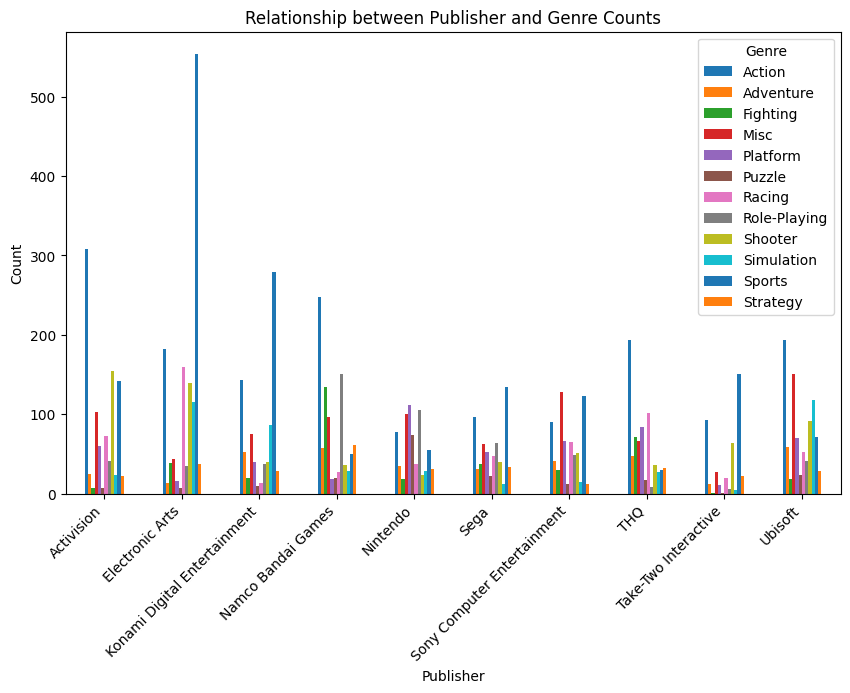

In [28]:
ctgTable.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Publisher and Genre Counts')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')
plt.show()

In [29]:
stats.chi2_contingency(ctgTable).pvalue

0.0

Since the p-value is less than the alpha of 0.05, we reject the null hypothesis.

## Hypothesis 2

- HO: The genre of a video game has no effect on the number of global sales.
- HA: The genre of a video has an effect on the number of global sales.

Getting the total amount of games made in each genre

In [30]:
column_sums = ctgTable.sum()
column_sums

,0
Genre,
Action,1623
Adventure,373
Fighting,374
Misc,852
Platform,529
Puzzle,194
Racing,595
Role-Playing,537
Shooter,677


Total number of games analyzed

In [31]:
total_sum = column_sums.sum()
total_sum

8108

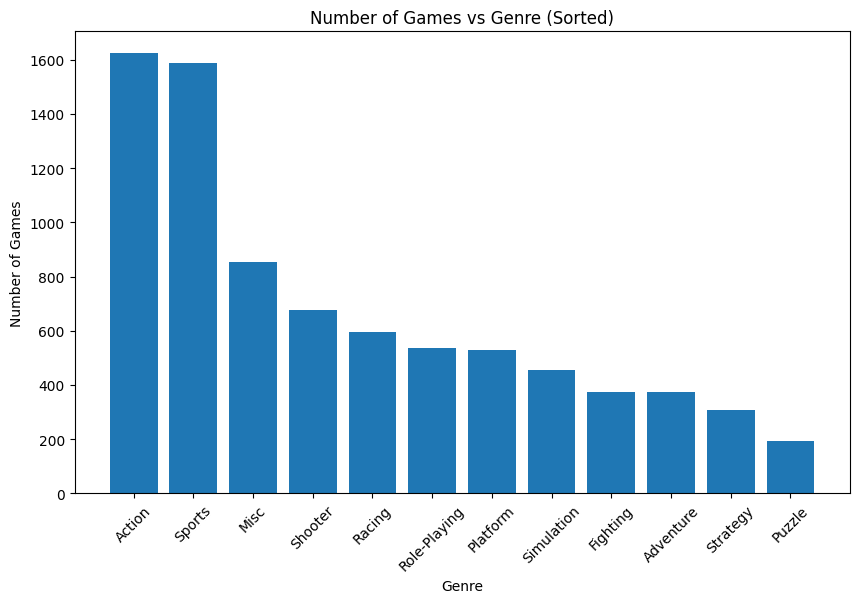

In [32]:
column_sums_sorted = column_sums.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(column_sums_sorted.index, column_sums_sorted.values)

plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games vs Genre (Sorted)')

plt.xticks(rotation=45)
plt.show()

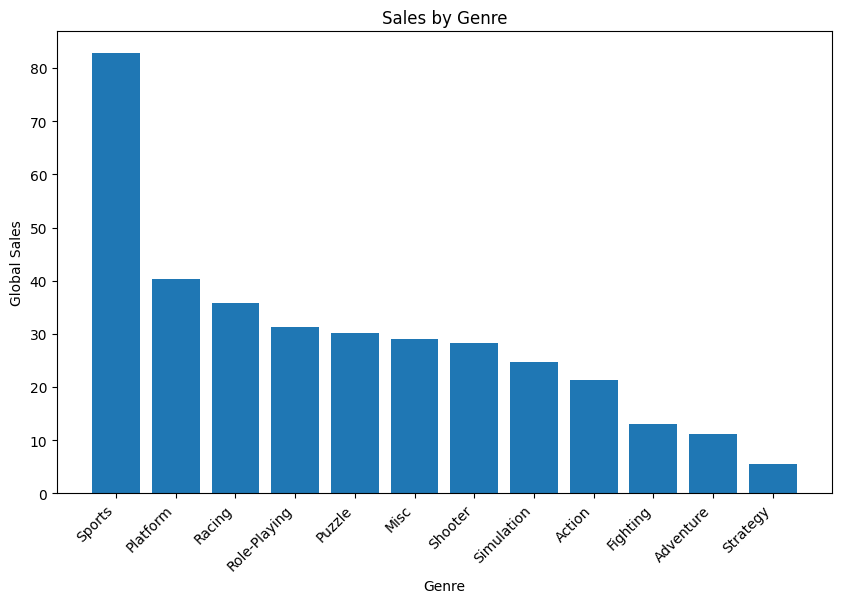

In [33]:
plt.figure(figsize=(10,6))
plt.bar(df['Genre'], df['Global_Sales'])
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
from scipy.stats import f_oneway
stats.f_oneway(df[df['Genre'] == 'Sports']['Global_Sales'],
                   df[df['Genre'] == 'Platform']['Global_Sales'],
                   df[df['Genre'] == 'Racing']['Global_Sales'],
                   df[df['Genre'] == 'Role-Playing']['Global_Sales'],
                   df[df['Genre'] == 'Puzzle']['Global_Sales'],
                   df[df['Genre'] == 'Misc']['Global_Sales'],
                   df[df['Genre'] == 'Shooter']['Global_Sales'],
                   df[df['Genre'] == 'Simulation']['Global_Sales'],
                   df[df['Genre'] == 'Action']['Global_Sales'],
                   df[df['Genre'] == 'Fighting']['Global_Sales'],
                   df[df['Genre'] == 'Adventure']['Global_Sales'],
                   df[df['Genre'] == 'Strategy']['Global_Sales']).pvalue


9.499868928228571e-37

The P-Value is 9.500e-37, which is much less than 0.05. This means that we reject the null hypothesis, because there is a significant difference in sales between the genres.

## Hypothesis 3

- HO: The sales amount of games are the same between NA and EU.
- HA: The sales amount of games are different between NA and EU.
- HO: The sales amount of games are the same between NA and JP.
- HA: The sales amount of games are different between NA and JP.
- HO: The sales amount of games are the same between JP and EU.
- HA: The sales amount of games are different between JP and EU.

In [35]:
from scipy.stats import ttest_ind
t_stat1, p_value1 = ttest_ind(df['NA_Sales'], df['EU_Sales'])
t_stat1, p_value2 = ttest_ind(df['NA_Sales'], df['JP_Sales'])
t_stat1, p_value3 = ttest_ind(df['JP_Sales'], df['EU_Sales'])
print(p_value1)
print(p_value2)
print(p_value3)

1.468329590009916e-54
1.2596328818939507e-160
4.072157537932554e-49


The p-value for the first two sample t-test is 1.4e-54, second t-test is 1.2e-160, and third t-test is 4.07e-49. All of these p-values are less than 0.05 so we reject the null hypothesis for all of the three tests. This means the sells for each country are different from each other.

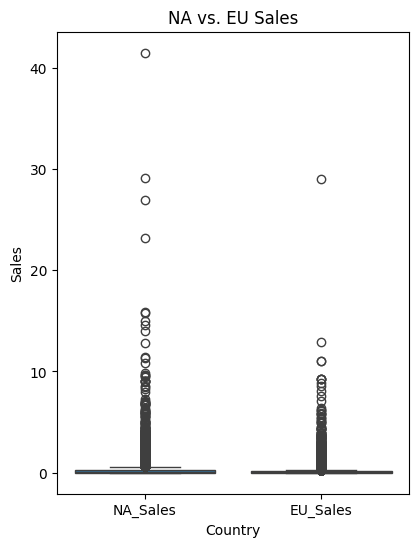

In [36]:
df_comp = df[['NA_Sales', 'EU_Sales']]
df_long = pd.melt(df_comp, var_name='Country', value_name='Sales')
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='Sales', data=df_long)
plt.title("NA vs. EU Sales")
plt.show()

## Summary

From our data analysis of our hypotheses, we found that:
- The publisher of a video game is dependent on the genre
- The genre of the game has an influence on sales
- The sales amount of games varies based on region


We used the three statistical methods: chi squared test, Anova test, and t-tests to find correlations and differences between our data. Using the chi squared test, we reached the conclusion that the publisher is dependent on the genre. Using the Anova test, we found that there is a significant difference in sales between genres. Finally using the t-tests, we found differences in sales between different countries.



There were a few notable outliers we found. Wii Sports did exceptionally well in terms of sales in North America and Europe. For NA Sales, Wii Sports sold 41.49 million copies, over 10 million more copies in NA than the second highest selling, Super Mario Bros for the NES. Wii Sports also was the top selling game in EU, with 29.02 million copies, over double the amount of the 12.88 million of the second highest selling game, Mario Kart Wii. However, it was the 25th best selling game in Japan, with 3.77 million copies compared to the 10.22 million of the top seller, Pokemon Red/Blue for Gameboy.



We also found that sports games as a whole were quite a bit more popular in terms of sales than any other genre of games. In terms of global sales, sports games had over 80 million sales when compared to the 40 million of second most popular genre, platform games. This may have been due to the sheer amount of sports games released compared to the other genres. Of the 8108 total game genres analyzed, a significant amount were either action (1623, or 20.02%) or sports (1589, or 19.6%). Surprisingly though, despite being the most popular game genre, action games sold relatively poorly, the 4th lowest sales out of all genres. Electronic Arts was the lead creator of sports games, with 554, or a massive 34.86% of the total sports games being made by them. The second largest sports game creator was Konami Digital Entertainment, with barely over half of EA’s sports games created (279).





#Primary Analysis

Based on our results from our exploration, we chose classification as the machine learning technique. We chose classification because our main goal is to predict the sales of a specific game based on a specfic feature such as genre, platform, publisher, and region. Our main concern is determining which combination of these categorical variables would result in the highest amount of sales. Classification can handle these large amounts of categorical data and can group them by genre and comparing them to sales.

We filtered out the years before the year 2003 to be more up to time.

In [37]:
df = df[df['Year'] >= 2003]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Visualization

<ipython-input-38-cd5bcd9d9591>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encoded_Genre'] = encoder.fit_transform(df['Genre'])


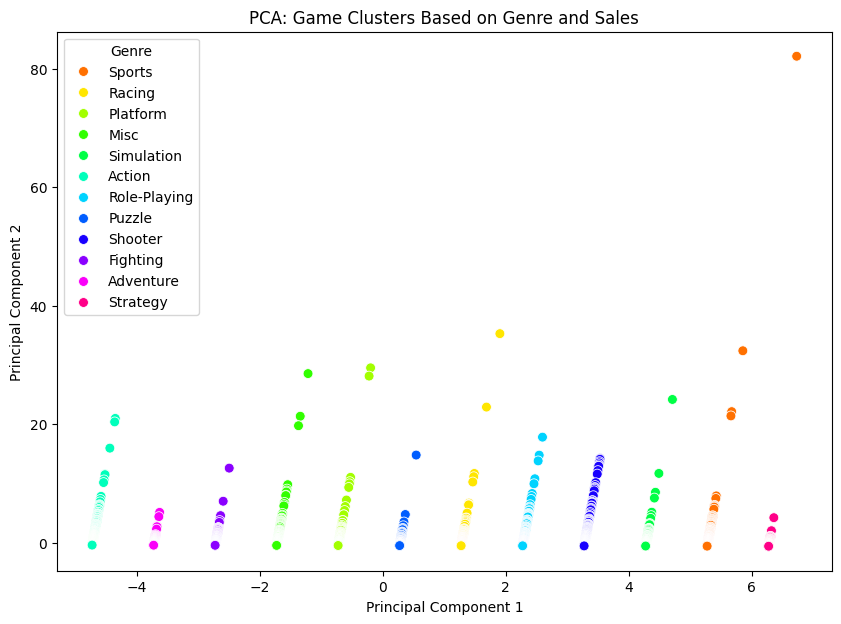

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

encoder = LabelEncoder()
df['Encoded_Genre'] = encoder.fit_transform(df['Genre'])

features = np.column_stack((df['Encoded_Genre'], df['Global_Sales']))

pca = PCA(n_components=2)
pca_results = pca.fit_transform(features)
palette = sns.color_palette("hsv", n_colors=len(df['Genre'].unique()))

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_results[:, 0],
    y=pca_results[:, 1],
    hue=df['Genre'],
    palette=palette,
    s=50
)

plt.title("PCA: Game Clusters Based on Genre and Sales")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Our graph shows clusters that are separated by genre and sorted alphabetically. Principal component 1 is genre in the x-axis while principal component 2 is sales in the y-axis. After filtering out the games by years after 2003, we discovered that shooter games are the most consistent and reliable game in making global sales as shown by tightly packed data points with the highest means, and the least successful game with the least global sales include adventure, strategy, and puzzle.

In [39]:

genre_means = df.groupby('Genre')['Global_Sales'].mean()

genre_means


,Global_Sales
Genre,
Action,0.484837
Adventure,0.147596
Fighting,0.464684
Misc,0.453525
Platform,0.691045
Puzzle,0.284194
Racing,0.560232
Role-Playing,0.538927
Shooter,0.833980


To confirm our findings, by looking at the means of the global sales of each genre, shooter games were the greatest with an average of .8339 million sales.


#Insights and Conclusions

After reading through the project, an uninformed reader should feel informed about the topic. Going through hypothesis testing 1 we can see that if we wanted to make a game we would want to pick a specific publisher as it will have a great impact on the game's success. Hypothesis 2 tells us that we should pick sports as the genera as it has the highest sales overall and it is at least not the most popular game production. For a new game creator that means it will be slightly less competitive than action with the highest promise of sales. This being said the reader can see that Electronic Arts is the leading creator of sports games thus they should go with that. Through just the hypothesis testing we know that the best game genera to pick is sports with Electronic Arts as the publisher.

Going through the analysis we can see that shooter games make the highest sales. With this knowledge, the best genre that is the safest to start with is shooter games. Sports games are usually popular because of the male user base but for a simple game that is likely to do well shooter games are the way to go and it is also less competitive. A reader with previous knowledge would know mainly which genres are the most popular and which genres will likely do well. This analysis narrows down the likely genres and shows which will be most consistent for easy games and what would be better for higher-quality games with a publisher. Overall, This analysis shows multiple options on what to move forward with for a new game developer and what route to take.
